<a href="https://colab.research.google.com/github/vanshtambadee/Airbnb-Data-analysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/content/compressed_data.csv")
df

/tmp/ipython-input-3-3549614657.py:1: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/compressed_data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70795,40101415,Special Rate Luxury 2bd/2bth Apt W. Village,7.846667e+10,verified,Tana,Manhattan,West Village,40.73268,-74.00314,United States,...,$208,1.0,2.0,8/23/2014,0.03,2.0,2.0,364.0,NaN,NaN
70796,40101967,"Fresh, Simple Sleep in Brooklyn!",3.553357e+10,unconfirmed,Chris And Zach,Brooklyn,East Flatbush,40.64895,-73.94838,United States,...,$80,1.0,245.0,7/6/2019,3.41,1.0,3.0,90.0,NaN,NaN
70797,40102519,NEEDS TO BE DEACTIVATED- NOT AVAILABLE,7.956322e+10,verified,Shamara,Manhattan,Washington Heights,40.83300,-73.93806,United States,...,$138,3.0,5.0,1/2/2015,0.07,2.0,1.0,365.0,NaN,NaN
70798,40103071,Warm & Welcoming Private Room,1.695730e+10,unconfirmed,Kerry,Brooklyn,Bushwick,40.70410,-73.92418,United States,...,$190,5.0,39.0,5/28/2017,0.56,2.0,1.0,187.0,NaN,NaN


In [4]:
df.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

**Check for missing Values**

In [5]:
print(df.isnull().sum())

id                                    0
NAME                                208
host id                               1
host_identity_verified              218
host name                           284
neighbourhood group                  30
neighbourhood                        17
lat                                   9
long                                  9
country                             324
country code                         87
instant_bookable                     87
cancellation_policy                  58
room type                             1
Construction year                   191
price                               212
service fee                         231
minimum nights                      364
number of reviews                   156
last review                       10895
reviews per month                 10881
review rate number                  246
calculated host listings count      145
availability 365                    439
house_rules                       38206


In [6]:
#convert last review in datetime
df['last review']=pd.to_datetime(df['last review'], errors='coerce')

In [7]:
df.fillna({'reviews per month': 0 , 'last review' : df['last review'].min()}, inplace = True)

In [8]:
df.dropna(subset = ['NAME','host name'], inplace = True)

In [15]:
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,276
host name,0
neighbourhood group,26
neighbourhood,16
lat,8
long,8
country,526


In [9]:
df.drop(columns=['license','house_rules'], errors ='ignore')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,4.549855e+10,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70794,40100862,Furnished room with private bathroom,2.713395e+10,verified,Marilyn,Manhattan,Roosevelt Island,40.76175,-73.95012,United States,...,2003.0,$328,$66,30.0,5.0,2018-08-18,0.15,5.0,1.0,2.0
70795,40101415,Special Rate Luxury 2bd/2bth Apt W. Village,7.846667e+10,verified,Tana,Manhattan,West Village,40.73268,-74.00314,United States,...,2018.0,"$1,039",$208,1.0,2.0,2014-08-23,0.03,2.0,2.0,364.0
70796,40101967,"Fresh, Simple Sleep in Brooklyn!",3.553357e+10,unconfirmed,Chris And Zach,Brooklyn,East Flatbush,40.64895,-73.94838,United States,...,2018.0,$399,$80,1.0,245.0,2019-07-06,3.41,1.0,3.0,90.0
70797,40102519,NEEDS TO BE DEACTIVATED- NOT AVAILABLE,7.956322e+10,verified,Shamara,Manhattan,Washington Heights,40.83300,-73.93806,United States,...,2010.0,$690,$138,3.0,5.0,2015-01-02,0.07,2.0,1.0,365.0


**Correct Data types**

In [10]:
df['price'] = df['price'].replace('[\$,]', '',  regex = True).astype(float)

In [11]:
df['service fee'] = df['service fee'].replace('[$,]', '',regex = True).astype(float)

**Remove Duplicates**

In [12]:
df.drop_duplicates(inplace=True)

**Confirm Data Cleaning**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70314 entries, 0 to 70798
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              70314 non-null  int64         
 1   NAME                            70314 non-null  object        
 2   host id                         70314 non-null  float64       
 3   host_identity_verified          70110 non-null  object        
 4   host name                       70314 non-null  object        
 5   neighbourhood group             70288 non-null  object        
 6   neighbourhood                   70298 non-null  object        
 7   lat                             70306 non-null  float64       
 8   long                            70306 non-null  float64       
 9   country                         69997 non-null  object        
 10  country code                    70237 non-null  object        
 11  instant

In [14]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,7.031400e+04,7.031400e+04,70306.000000,70306.000000,70138.000000,70106.000000,70084.000000,69957.000000,70160.000000,70314,70314.000000,70081.000000,70171.000000,69904.000000
mean,2.057408e+07,4.929136e+10,40.728084,-73.949325,2012.486256,624.515819,124.853333,8.734551,28.788412,2018-08-12 13:43:49.883095808,1.171621,3.314151,8.855938,153.709530
min,1.001254e+06,1.297566e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.076780e+07,2.456169e+10,40.688510,-73.982830,2007.000000,338.000000,68.000000,2.000000,1.000000,2017-09-15 00:00:00,0.100000,2.000000,1.000000,17.000000
50%,2.060771e+07,4.915560e+10,40.722685,-73.954580,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-09 00:00:00,0.510000,3.000000,1.000000,128.000000
75%,3.035594e+07,7.404830e+10,40.762720,-73.931860,2017.000000,912.000000,182.000000,6.000000,31.000000,2020-08-22 00:00:00,1.710000,4.000000,3.000000,282.000000
max,4.010307e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.129191e+07,2.853821e+10,0.055900,0.050208,5.764476,331.775417,66.346672,34.380041,53.108821,NaN,1.711903,1.262719,34.560436,134.890577


Visualization                             
What is the distribution of listing prices?

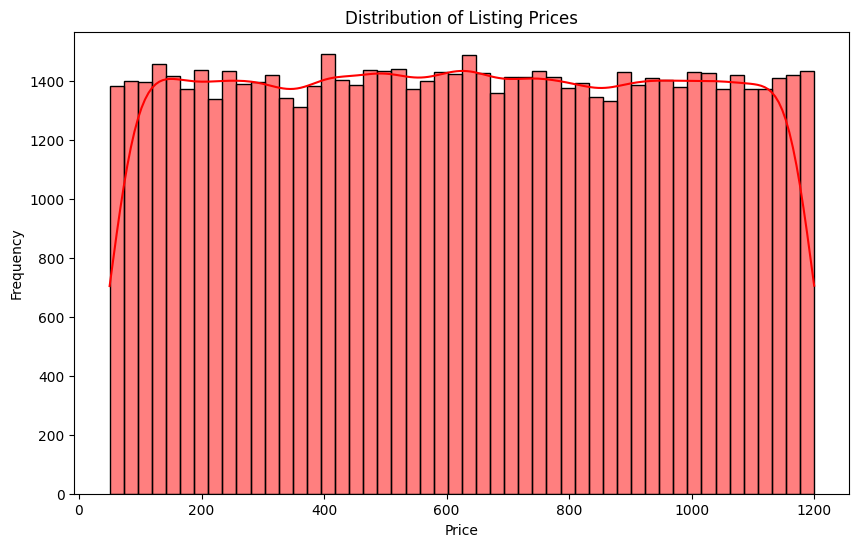

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Room Type Analysis                              
Analyse the distribution of different room types

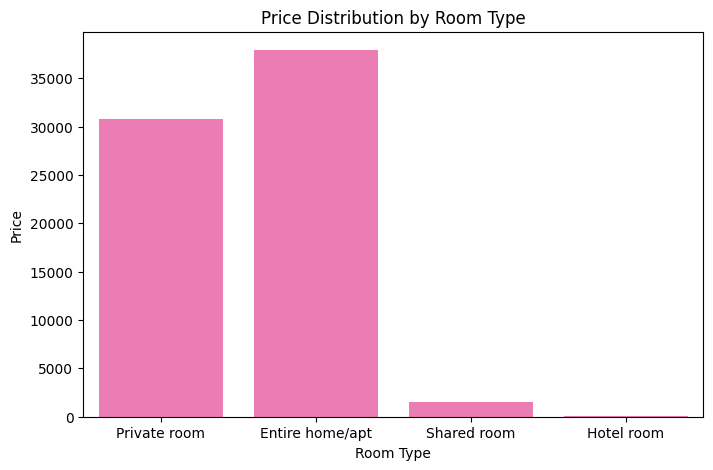

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type', data=df, color='hotpink')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Neighbourhood analysis                              
Examine how listings are distributed across different neighbourhoods

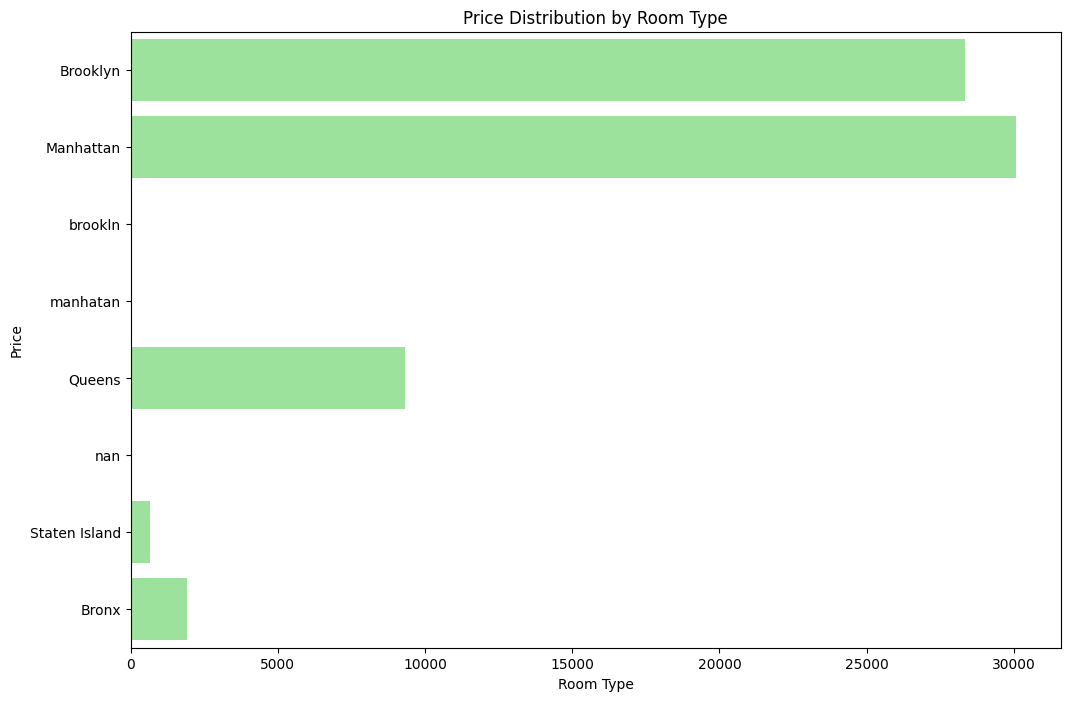

In [21]:
plt.figure(figsize=(12,8))
sns.countplot( y='neighbourhood group', data=df, order=df['neighbourhood group'], color= 'lightgreen')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Price vs room type

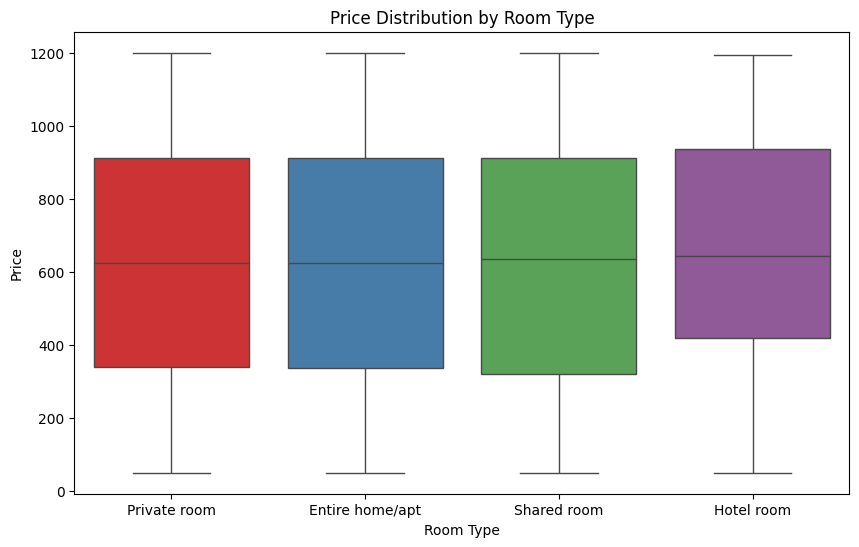

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type', y='price', data=df, color='lightgreen',palette = 'Set1', hue='room type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [25]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,4.549855e+10,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN


Reviews over time                   
Plot the number of reviews over time

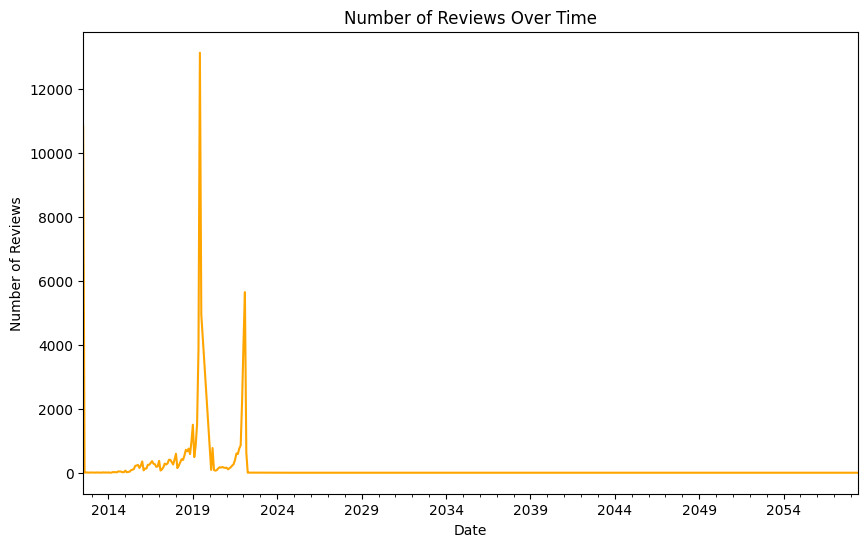

In [27]:
df['last review']=pd.to_datetime(df['last review'], errors='coerce')
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(10,6))
reviews_over_time.plot(kind='line', color='orange')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()
